In [10]:
!pip install qiskit qiskit-aer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 119.6 MB/s eta 0:00:00


In [15]:
!pip install pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=c49f25149d5d2784e753d013691c776f3d0b8a006426957df1863d89875d4c47
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178beee1939180d46
Successfully built pylatexenc


In [10]:
import matplotlib.pyplot as plt

Fidelity between outputs (should be 1.0): 0.9999999999999998

Circuit left(c):


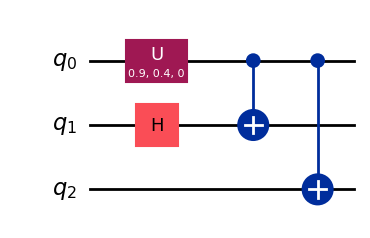

In [15]:
# Qiskit: show Mermin Fig 6.5(c) and (d) have the same action (on the part that differs)


from qiskit import QuantumCircuit
from qiskit_aer import Aer
from qiskit.quantum_info import Statevector, state_fidelity
import numpy as np


# Build the LEFT blocks

def left_block_c():
    # (a,b,c) = (top, middle, bottom)
    qc = QuantumCircuit(3, name="left(c)")
    qc.cx(0, 1)   # b ^= a
    qc.cx(0, 2)   # c ^= a
    return qc

def left_block_d():
    qc = QuantumCircuit(3, name="left(d)")
    qc.cx(1, 2)   # c ^= b
    qc.cx(0, 1)   # b ^= a
    qc.cx(1, 2)   # c ^= b  -> net: c ^= a
    return qc

# Compare on a selected input
def prepare_selected_input():
    """
    Prepare:
      top    = |psi> via U(theta,phi,0)
      middle = |phi> = H|0>   (as in the figure)
      bottom = |0>
    """
    theta = 0.9
    phi   = 0.4

    qc = QuantumCircuit(3)
    qc.u(theta, phi, 0.0, 0)  # |psi> on top
    qc.h(1)                   # |phi> on middle
    # bottom stays |0>
    return qc

# Compare final states
prep = prepare_selected_input()

qc_c = prep.compose(left_block_c())
qc_d = prep.compose(left_block_d())

sv_c = Statevector.from_instruction(qc_c)
sv_d = Statevector.from_instruction(qc_d)

print("Fidelity between outputs (should be 1.0):", float(np.real(state_fidelity(sv_c, sv_d))))
print("\nCircuit left(c):")
qc_c.draw(output='mpl')




Circuit left(d):


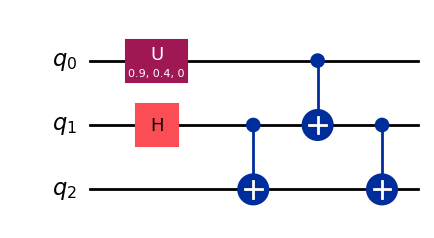

In [16]:
print("\nCircuit left(d):")
qc_d.draw(output='mpl')